In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

import warnings            
warnings.filterwarnings("ignore") 


The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

In [2]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have a lot of missing population values in  many countries. We alsa have GDP values from population for each countries as well. Therefore, I preferred to drop coloumn from data frame.

In [5]:
LifeExpectancyData.drop('Population', inplace=True, axis=1)

In [6]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [8]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()

bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])

bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]

Hepatitis_B                        0.188223
GDP                                0.152485
Total_Expenditure                  0.076923
Alcohol                            0.066031
Income_composition_of_resources    0.056841
Schooling                          0.055480
BMI                                0.011572
thinness_1_19_years                0.011572
thinness_5_9_years                 0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult_Mortality                    0.003404
Life_Expectancy                    0.003404
under_five_deaths                  0.000000
Name: bos_yuzde, dtype: float64

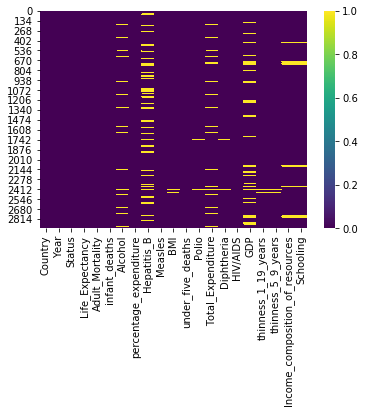

In [9]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

In [10]:
fill_list = (bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]).index

In [11]:
fill_list

Index(['Hepatitis_B', 'GDP', 'Total_Expenditure', 'Alcohol',
       'Income_composition_of_resources', 'Schooling', 'BMI',
       'thinness_1_19_years', 'thinness_5_9_years', 'Diphtheria', 'Polio',
       'Adult_Mortality', 'Life_Expectancy', 'under_five_deaths'],
      dtype='object')

***BFILL ILE DOLDURMA***

In [12]:
df_bfill = LifeExpectancyData.copy()

for col in fill_list: 
    df_bfill[col] = df_bfill.groupby('Country')[col].transform(lambda x: x.fillna(method = 'bfill'))

In [13]:
df_bfill.isnull().sum()
##Halen dolmayan degerler var.

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_Expenditure                   47
Diphtheria                          19
HIV/AIDS                             0
GDP                                431
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [14]:
df_bfill[df_bfill.Life_Expectancy.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,0,98.0,3.58,98.0,0.1,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,0,96.0,5.58,96.0,0.1,722.756650,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,0,79.0,17.24,79.0,0.1,3617.752354,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,0,87.0,4.65,87.0,0.1,136.183210,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,0,99.0,7.20,99.0,0.1,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,0,99.0,9.27,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,0,96.0,6.14,96.0,0.1,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,0,9.0,16.61,9.0,0.1,3542.135890,0.2,0.1,NaN,0.0


***MEAN ILE DOLDURMA***

In [16]:
countries = LifeExpectancyData.Country.unique()

In [17]:
df_mean = LifeExpectancyData.copy()

for country in countries:
    df_mean[col].fillna(df_mean.groupby(by='Country').mean()[col], inplace= True)

In [18]:
df_mean.isnull().sum()
##Halen dolmayan degerler var.

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [19]:
df_lambda= LifeExpectancyData.copy()

for col in fill_list:
    df_lambda[col] = df_lambda.groupby("Year").transform(lambda x: x.fillna(x.mean()))

In [20]:
df_lambda.Life_Expectancy.isnull().sum()

0

In [21]:
df_lambda[df_lambda.Country == 'Cook Islands']       

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,71.236066,71.236066,0,71.236066,0.0,71.236066,0,...,71.236066,71.236066,71.236066,71.236066,0.1,71.236066,71.236066,71.236066,71.236066,71.236066


# Hepsini ayni sayisal degerlerle doldurmus oldugumuzu bu kodla goruyoruz.
#LifeExpectancyData_fill_list[LifeExpectancyData_fill_list.Country == 'Algeria']

***Interpolate BOTH ile doldurma***

In [22]:
df_int_both = LifeExpectancyData.copy()

for col in fill_list:
    df_int_both[col] = df_int_both.groupby('Country')[col].transform(lambda x: x.interpolate(limit_direction='both'))
    

In [23]:
df_int_both.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis_B                        144
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                                0
Total_Expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

***Col Mean alip Inplace ile doldurma***

In [26]:
df_inp = LifeExpectancyData.copy()

for col in fill_list: 
    df_inp[col].fillna(df_inp.groupby(by = 'Country').mean()[col], inplace= True)

In [27]:
df_inp.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

***NP ROUND ile doldurma***

In [28]:
df_round = LifeExpectancyData.copy()

for col in fill_list:
    df_round[col] = df_round.groupby('Country')[col].transform(lambda x: x.fillna(np.round(x.mean())))

In [29]:
df_round.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis_B                        144
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                                0
Total_Expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [46]:
bos_hucre_toplam = df_round.isnull().sum()
bos_hucre_yuzde = df_round.isnull().sum()/df_round.isnull().count()

bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])

bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]

GDP                                0.137849
Income_composition_of_resources    0.056841
Schooling                          0.055480
Hepatitis_B                        0.049013
BMI                                0.011572
thinness_1_19_years                0.011572
thinness_5_9_years                 0.011572
Total_Expenditure                  0.010892
Alcohol                            0.005786
Adult_Mortality                    0.003404
Life_Expectancy                    0.003404
HIV/AIDS                           0.000000
Diphtheria                         0.000000
Polio                              0.000000
Name: bos_yuzde, dtype: float64

In [49]:
fill_list_df_round = (bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]).index

***Ornek bir sutunu baska ulkeye ait atirin mean ile doldurma calismasi***

In [50]:
LifeExpectancyData_filled = LifeExpectancyData.copy()

In [51]:
LifeExpectancyData_filled.GDP = LifeExpectancyData_filled.groupby('Country').GDP.transform(lambda x: x.fillna(np.round(x.mean())))

In [52]:
LifeExpectancyData_filled.GDP.isnull().sum()

405

***ALKOL SUTUNU DOLDURMA CALISMASI***

In [53]:
df_round[df_round.Alcohol.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,0,99.0,9.27,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,39,41.0,3.00,31.0,3.4,758.725782,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,31.0,441,...,39,44.0,2.74,39.0,3.5,1151.861715,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,31.0,525,...,40,5.0,2.62,45.0,3.6,1186.113250,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,31.0,1952,...,40,64.0,2.77,59.0,3.8,958.455810,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,31.0,1256,...,41,66.0,3.00,61.0,3.9,176.971300,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,31.0,0,...,41,44.0,3.00,47.0,4.0,1562.239346,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,31.0,0,...,42,44.0,3.00,47.0,4.2,1264.789980,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,31.0,0,...,42,44.0,3.00,47.0,4.2,1678.711862,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,31.0,0,...,43,44.0,3.00,47.0,4.2,1092.000000,NaN,NaN,0.000,0.0


***ALKOL SUTUNUNU interpolate method=index ile doldurmak***

In [77]:
df_round['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [54]:
sudan_means = df_round[df_round.Country == 'Sudan'].mean()

In [56]:
df_sudan_filling = df_round.copy()

for col in fill_list_df_round:
    df_sudan_filling[col] = df_sudan_filling.interpolate(method="index")
    

In [58]:
df_round.Alcohol.isnull().sum()

17

In [88]:
df_sudan_filling2 = df_round.copy()

for col in fill_list:
    df_sudan_filling2[col] = df_sudan_filling2.groupby('Country')[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [60]:
df_round.Alcohol.isnull().sum()

17

In [81]:
df_round['Alcohol'].fillna(df_round.Country == 'Sudan').mean()

4.571902654867281

In [100]:
df_round.loc[[2409,2424], 'Alcohol'] = df_round['Alcohol'].fillna(df_round.Country == 'Sudan').mean()

In [101]:
df_round[df_round.Alcohol.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,South Sudan
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2,NaN
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,31.0,441,...,44.0,2.74,39.0,3.5,1151.861715,NaN,NaN,0.421,4.9,NaN
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,31.0,525,...,5.0,2.62,45.0,3.6,1186.113250,NaN,NaN,0.417,4.9,NaN
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,31.0,1952,...,64.0,2.77,59.0,3.8,958.455810,NaN,NaN,0.419,4.9,NaN
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,31.0,1256,...,66.0,3.00,61.0,3.9,176.971300,NaN,NaN,0.429,4.9,NaN
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,31.0,0,...,44.0,3.00,47.0,4.0,1562.239346,NaN,NaN,0.000,0.0,NaN
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,31.0,0,...,44.0,3.00,47.0,4.2,1264.789980,NaN,NaN,0.000,0.0,NaN
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,31.0,0,...,44.0,3.00,47.0,4.2,1678.711862,NaN,NaN,0.000,0.0,NaN
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,31.0,0,...,44.0,3.00,47.0,4.2,1092.000000,NaN,NaN,0.000,0.0,NaN
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,31.0,0,...,44.0,3.00,47.0,4.1,1092.000000,NaN,NaN,0.000,0.0,NaN


# SONUNDA ALKOL SUTUNU SOUTH SUDAN ICIN DOLDU ama PALAU DA EKLENMIS OLDU

In [110]:
df_round["Alcohol"].fillna(df_round.groupby(df_round.Country == 'Sudan')["Alcohol"].transform("mean"), inplace=True)
df_round[df_round.Country == 'South Sudan']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,South Sudan
2410,South Sudan,2014,Developing,56.6,343.0,26,4.615937,46.074469,31.0,441,...,44.0,2.74,39.0,3.5,1151.861715,NaN,NaN,0.421,4.9,NaN
2411,South Sudan,2013,Developing,56.4,345.0,26,4.615937,47.444530,31.0,525,...,5.0,2.62,45.0,3.6,1186.113250,NaN,NaN,0.417,4.9,NaN
2412,South Sudan,2012,Developing,56.0,347.0,26,4.615937,38.338232,31.0,1952,...,64.0,2.77,59.0,3.8,958.455810,NaN,NaN,0.419,4.9,NaN
2413,South Sudan,2011,Developing,55.4,355.0,27,4.615937,0.000000,31.0,1256,...,66.0,3.00,61.0,3.9,176.971300,NaN,NaN,0.429,4.9,NaN
2414,South Sudan,2010,Developing,55.0,359.0,27,4.615937,0.000000,31.0,0,...,44.0,3.00,47.0,4.0,1562.239346,NaN,NaN,0.000,0.0,NaN
2415,South Sudan,2009,Developing,54.3,369.0,27,4.615937,0.000000,31.0,0,...,44.0,3.00,47.0,4.2,1264.789980,NaN,NaN,0.000,0.0,NaN
2416,South Sudan,2008,Developing,53.6,377.0,27,4.615937,0.000000,31.0,0,...,44.0,3.00,47.0,4.2,1678.711862,NaN,NaN,0.000,0.0,NaN
2417,South Sudan,2007,Developing,53.1,381.0,27,4.615937,0.000000,31.0,0,...,44.0,3.00,47.0,4.2,1092.000000,NaN,NaN,0.000,0.0,NaN
2418,South Sudan,2006,Developing,52.5,383.0,28,4.615937,0.000000,31.0,0,...,44.0,3.00,47.0,4.1,1092.000000,NaN,NaN,0.000,0.0,NaN
2419,South Sudan,2005,Developing,51.9,383.0,28,4.615937,0.000000,31.0,0,...,44.0,3.00,47.0,3.9,1092.000000,NaN,NaN,0.000,0.0,NaN


In [111]:
df_round[df_round.Country == 'Palau']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,South Sudan
1958,Palau,2013,Developing,NaN,NaN,0,4.615937,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.12237,0.1,0.1,0.779,14.2,NaN


In [112]:
df_round.loc[[1958], 'Alcohol'] = df_round['Alcohol'].fillna(df_round.Country == 'Philippines').mean()

In [113]:
df_round[df_round.Country == 'Palau']

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,South Sudan
1958,Palau,2013,Developing,NaN,NaN,0,4.598584,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.12237,0.1,0.1,0.779,14.2,NaN


# BU ISLEMLER SONRASI SOUTH SUDAN SUTUNU EKLENDI

In [126]:
df_round.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,South Sudan
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,NaN
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,NaN
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,NaN
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,NaN


In [129]:
df_round.drop('South Sudan',inplace = True, axis=1)

In [132]:
fill_list2 = df_round.isnull().sum()

In [135]:
fill_list2.sort_values(ascending = False)[:10]

GDP                                405
Income_composition_of_resources    167
Schooling                          163
Hepatitis_B                        144
BMI                                 34
thinness_1_19_years                 34
thinness_5_9_years                  34
Total_Expenditure                   32
Adult_Mortality                     10
Life_Expectancy                     10
dtype: int64

In [143]:
df_round['GDP'].fillna(df_round.groupby(df_round.Country)['GDP'].transform("mean"), inplace=True)

In [146]:
df_round[df_round.GDP.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
160,Bahamas,2015,Developing,76.1,147.0,0,10.00,0.0,95.0,0,...,0,95.0,7.00,95.0,0.1,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,...,0,96.0,7.74,96.0,0.1,NaN,2.5,2.5,0.789,12.6
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,...,0,97.0,7.50,97.0,0.1,NaN,2.5,2.5,0.790,12.6
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,96.0,0,...,0,99.0,7.43,98.0,0.2,NaN,2.5,2.5,0.789,12.6
164,Bahamas,2011,Developing,75.0,162.0,0,9.34,0.0,95.0,0,...,0,97.0,7.63,98.0,0.1,NaN,2.5,2.5,0.788,12.6
165,Bahamas,2010,Developing,75.0,161.0,0,9.19,0.0,98.0,0,...,0,97.0,7.44,99.0,0.2,NaN,2.5,2.5,0.788,12.6
166,Bahamas,2009,Developing,74.6,168.0,0,9.29,0.0,95.0,0,...,0,97.0,7.43,96.0,0.1,NaN,2.5,2.5,0.791,12.6
167,Bahamas,2008,Developing,74.5,167.0,0,10.15,0.0,9.0,0,...,0,93.0,7.30,93.0,0.1,NaN,2.5,2.5,0.791,12.6
168,Bahamas,2007,Developing,74.4,167.0,0,10.75,0.0,93.0,0,...,0,95.0,7.80,95.0,0.1,NaN,2.5,2.5,0.790,12.5
169,Bahamas,2006,Developing,74.2,171.0,0,11.07,0.0,96.0,0,...,0,94.0,6.93,95.0,0.1,NaN,2.5,2.5,0.788,12.4


In [ ]:
df_GDP = df_round.copy()

for col in fill_list2:
    df_GDP[col] = df_GDP

In [155]:
import os
os.getcwd()

'C:\\Users\\ece-yusuf-sekoya\\Pyhton_Projeler\\Proje 2'

In [159]:
os.chdir('C:\\Users\\ece-yusuf-sekoya\\Pyhton_Projeler\\Proje 2')

In [186]:
HappinessReport = pd.read_csv('./data/Happiness_report2.csv')

In [187]:
HappinessReport.head()

,Unnamed: 0,Country,Dystopia_Residual,Economy_GDP_per_Capita,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health_Life_Expectancy,Region,Trust_Government_Corruption,Year
0,0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015
1,1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015
2,2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.48357,2015
3,3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.36503,2015
4,4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.32957,2015


In [193]:
HappinessReport.columns

Index(['Unnamed: 0', 'Country', 'Dystopia_Residual', 'Economy_GDP_per_Capita',
       'Family', 'Freedom', 'Generosity', 'Happiness_Rank', 'Happiness_Score',
       'Health_Life_Expectancy', 'Region', 'Trust_Government_Corruption',
       'Year'],
      dtype='object')

In [194]:
display('HappinessReport()', 'df_round()')

'HappinessReport()'

'df_round()'

In [196]:
merged = pd.merge(df_round, HappinessReport, how='outer',
                  left_on='Country', right_on='Year')
merged = merged.drop('0', 'Country', 'Dystopia_Residual', 'Economy_GDP_per_Capita',
       'Family', 'Freedom', 'Generosity', 'Happiness_Rank', 'Happiness_Score',
       'Health_Life_Expectancy', 'Trust_Government_Corruption',
       'Year', 1)
merged.head()

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [202]:
df_append = df_round.append(HappinessReport['Region'],ignore_index = True).head()

In [203]:
df_append.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,460,461,462,463,464,465,466,467,468,469
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
;